In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
shopping_trends = pd.read_csv("shopping_trends.csv")

In [95]:
shopping_trends.keys()

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [96]:
shopping_trends.shape

(3900, 19)

In [97]:
shopping_trends.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [98]:
shopping_trends.info

<bound method DataFrame.info of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2            

In [99]:
shopping_trends.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [100]:
shopping_trends.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [101]:
shopping_trends.ndim

2

In [102]:
shopping_trends.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [103]:
shopping_trends.duplicated().sum()

0

In [137]:
Q1 = shopping_trends["Purchase Amount (USD)"].quantile(0.25)
Q3 = shopping_trends["Purchase Amount (USD)"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -24.0
Upper Bound: 144.0


In [138]:
outliers = shopping_trends[
    (shopping_trends["Purchase Amount (USD)"] < lower_bound) |
    (shopping_trends["Purchase Amount (USD)"] > upper_bound)
]

print("Number of outliers:", len(outliers))
outliers.head()

Number of outliers: 0


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Frequency Score,Age Group


In [144]:
age_bins = [17, 25, 35, 50, 70, 100]
age_labels = ["18–25", "26–35", "36–50", "51-70", "70+"]

shopping_trends["Age Group"] = pd.cut(
    shopping_trends["Age"],
    bins=age_bins,
    labels=age_labels)

shopping_trends[["Age", "Age Group"]].head()

,Age,Age Group
0,55,51-70
1,19,18–25
2,50,36–50
3,21,18–25
4,45,36–50


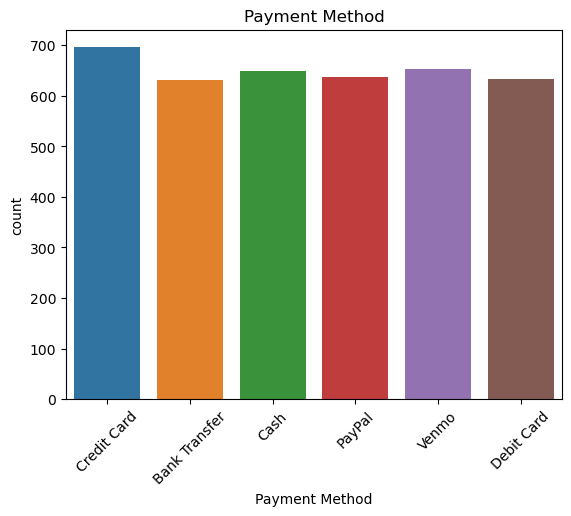

In [104]:
sns.countplot(x='Payment Method', data=shopping_trends)
plt.xticks(rotation=45)
plt.title("Payment Method")
plt.show()

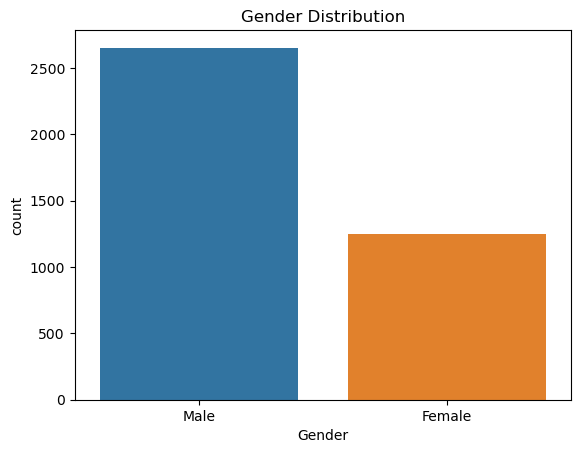

In [105]:
sns.countplot(x='Gender', data=shopping_trends)
plt.title("Gender Distribution")
plt.show()

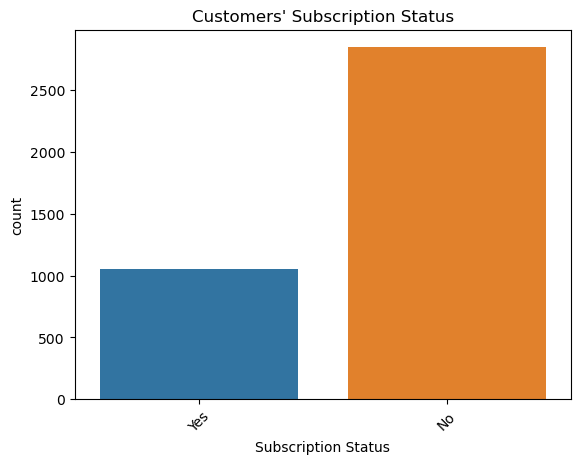

In [106]:
sns.countplot(x='Subscription Status', data=shopping_trends)
plt.xticks(rotation=45)
plt.title("Customers' Subscription Status")
plt.show()

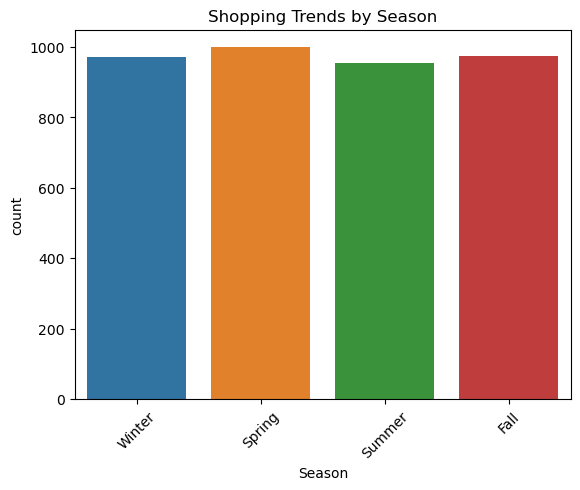

In [107]:
sns.countplot(x='Season', data=shopping_trends)
plt.xticks(rotation=45)
plt.title("Shopping Trends by Season")
plt.show()

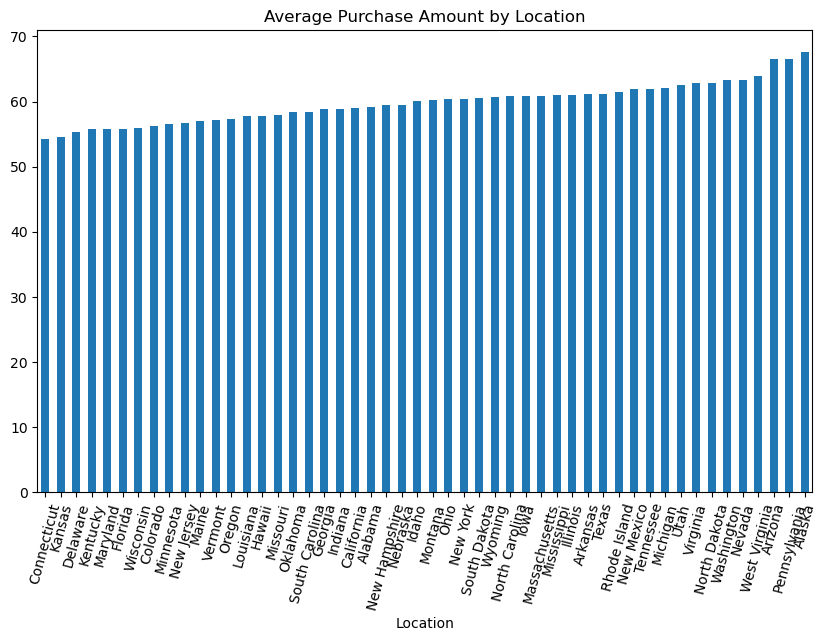

In [108]:
plt.figure(figsize=(10,6))
shopping_trends.groupby('Location')['Purchase Amount (USD)'].mean().sort_values() \
    .plot(kind='bar')
plt.title('Average Purchase Amount by Location')
plt.xticks(rotation= 75)
plt.show()

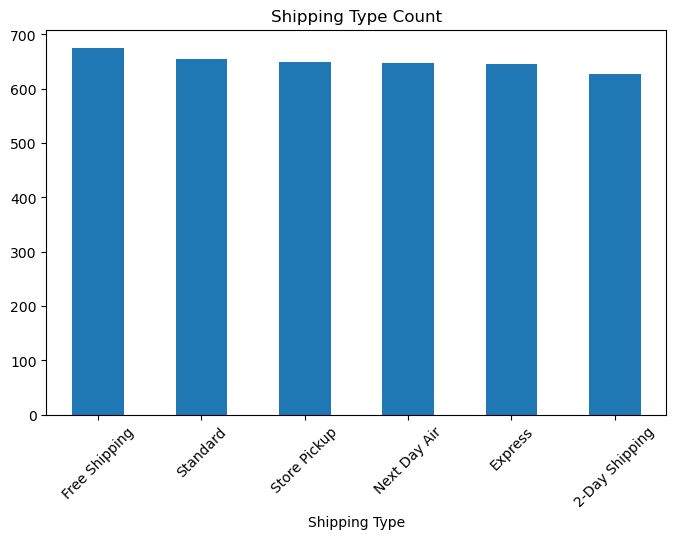

In [109]:
plt.figure(figsize=(8,5))
shopping_trends['Shipping Type'].value_counts().plot(kind='bar')
plt.title('Shipping Type Count')
plt.xticks(rotation=45)
plt.show()

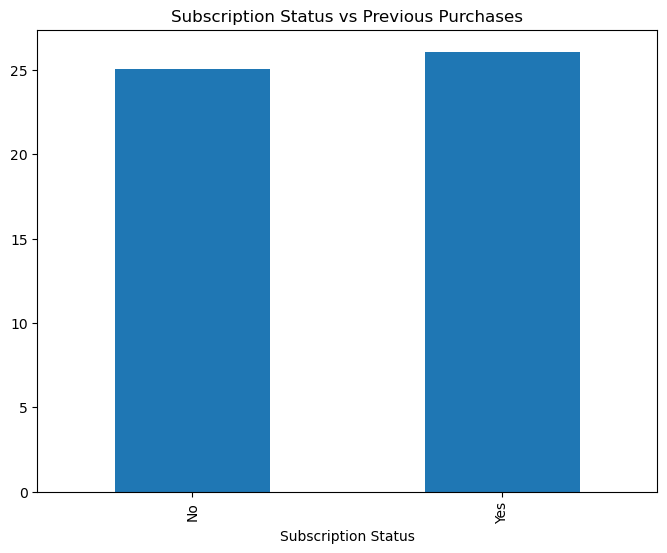

In [110]:
plt.figure(figsize=(8,6))
shopping_trends.groupby('Subscription Status')['Previous Purchases'].mean().plot.bar()
plt.title('Subscription Status vs Previous Purchases')
plt.show()

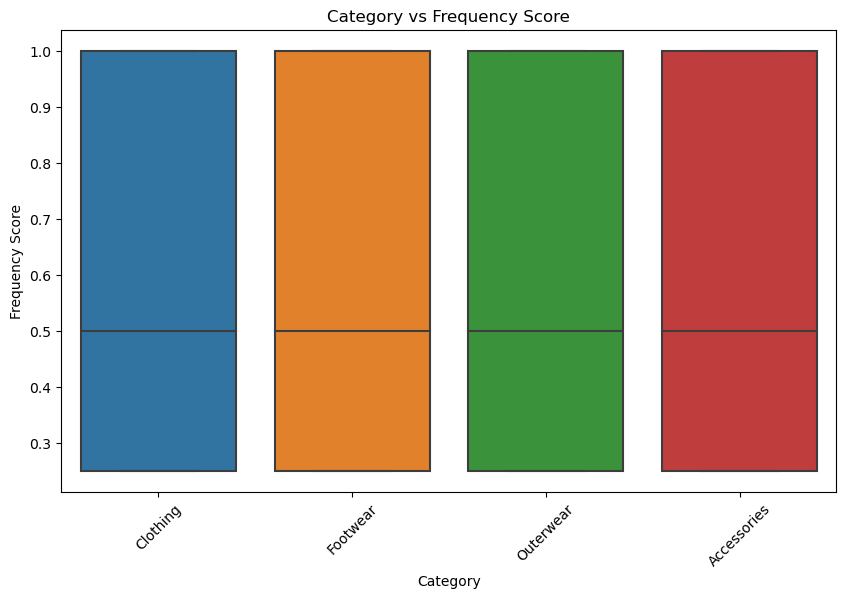

In [111]:
freq_map = {'Daily': 7, 'Weekly': 1, 'Fortnightly': 0.5, 'Monthly': 0.25}
shopping_trends['Frequency Score'] = shopping_trends['Frequency of Purchases'].map(freq_map)
plt.figure(figsize=(10,6))
sns.boxplot(data=shopping_trends, x='Category', y='Frequency Score')
plt.xticks(rotation=45)
plt.title('Category vs Frequency Score')
plt.show()

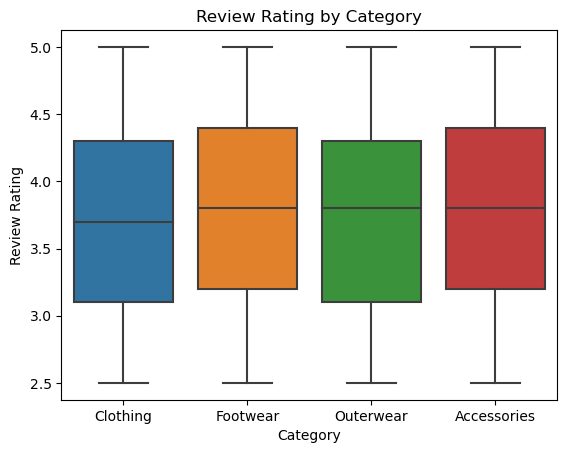

In [112]:
sns.boxplot(x='Category', y='Review Rating', data=shopping_trends)
plt.title('Review Rating by Category')
plt.show()

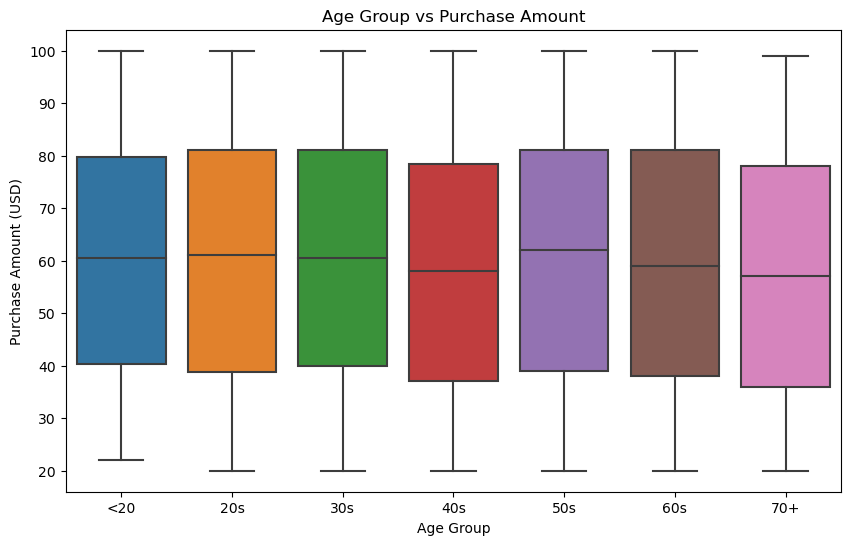

In [113]:
shopping_trends['Age Group'] = pd.cut(
    shopping_trends['Age'],
    bins=[0,19,29,39,49,59,69,100],
    labels=['<20','20s','30s','40s','50s','60s','70+'])
plt.figure(figsize=(10,6))
sns.boxplot(data=shopping_trends, x='Age Group', y='Purchase Amount (USD)')
plt.title('Age Group vs Purchase Amount')
plt.show()

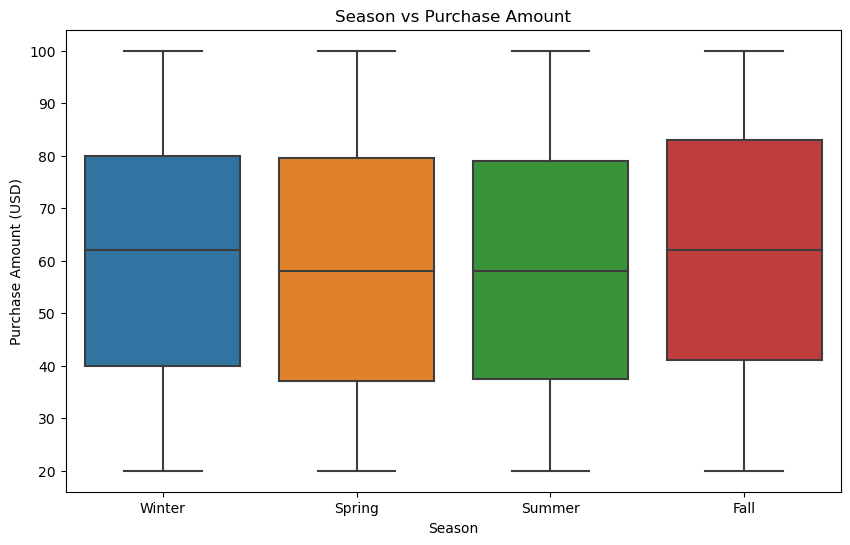

In [114]:
plt.figure(figsize=(10,6))
sns.boxplot(data=shopping_trends, x='Season', y='Purchase Amount (USD)')
plt.title('Season vs Purchase Amount')
plt.show()

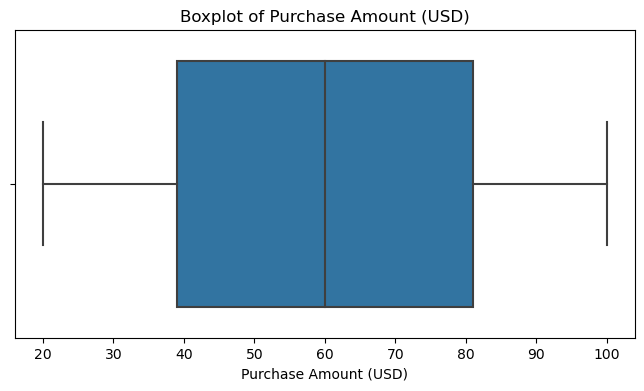

In [136]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=shopping_trends, x="Purchase Amount (USD)")
plt.title("Boxplot of Purchase Amount (USD)")
plt.show()

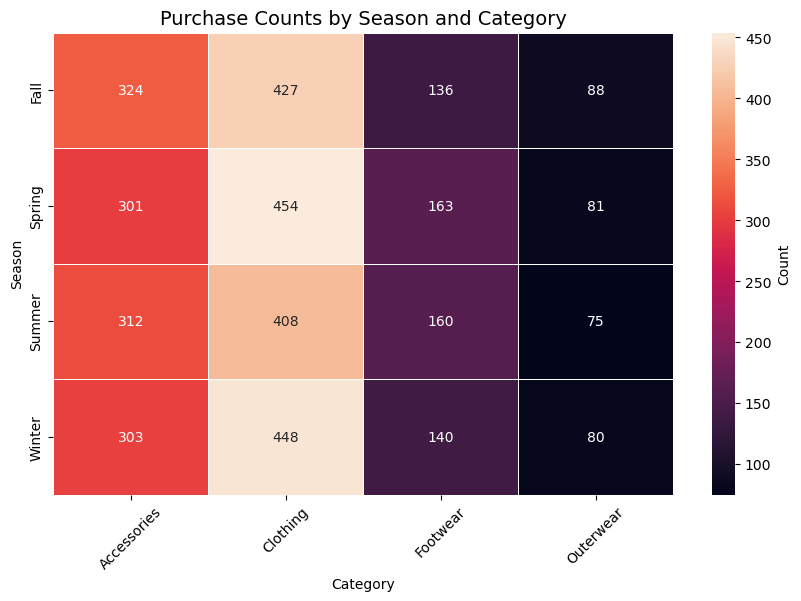

In [115]:
cross = pd.crosstab(shopping_trends['Season'], shopping_trends['Category'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross, annot=True, fmt='d', cmap='rocket', linewidths=0.5, cbar_kws={'label': 'Count'})
plt.title('Purchase Counts by Season and Category', fontsize=14)
plt.xticks(rotation=45)
plt.show()

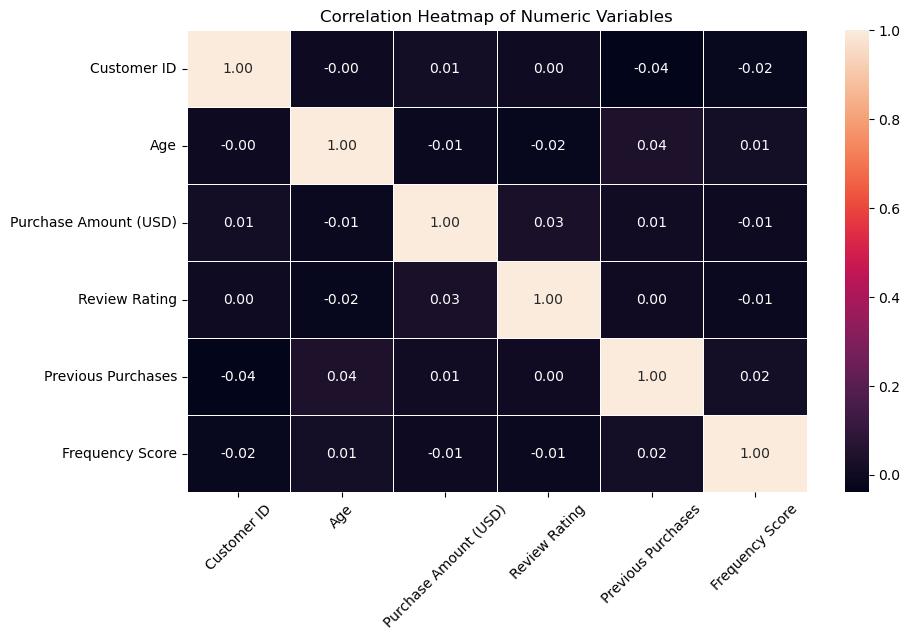

In [116]:
numeric_df = shopping_trends.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

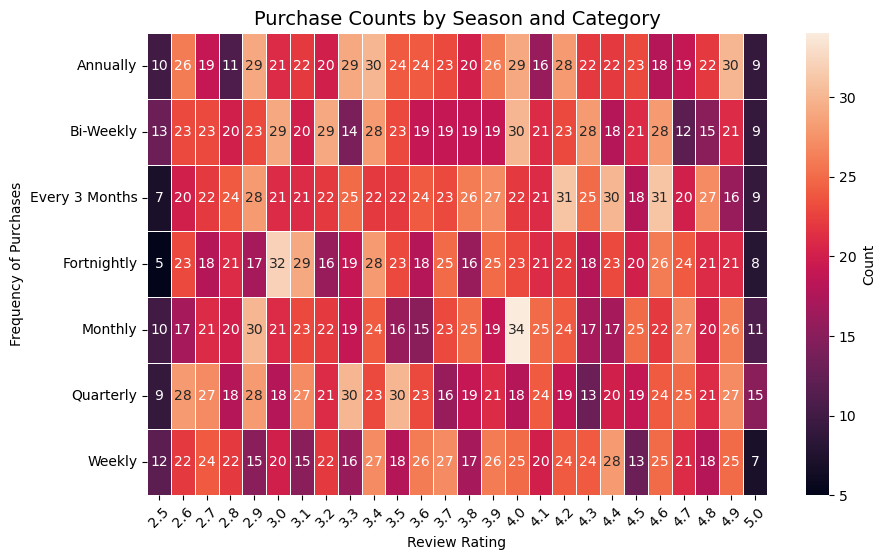

In [117]:

cross = pd.crosstab(shopping_trends['Frequency of Purchases'], shopping_trends['Review Rating'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross, annot=True, fmt='d', cmap='rocket', linewidths=0.5, cbar_kws={'label': 'Count'})
plt.title('Purchase Counts by Season and Category', fontsize=14)
plt.xticks(rotation=45)
plt.show()

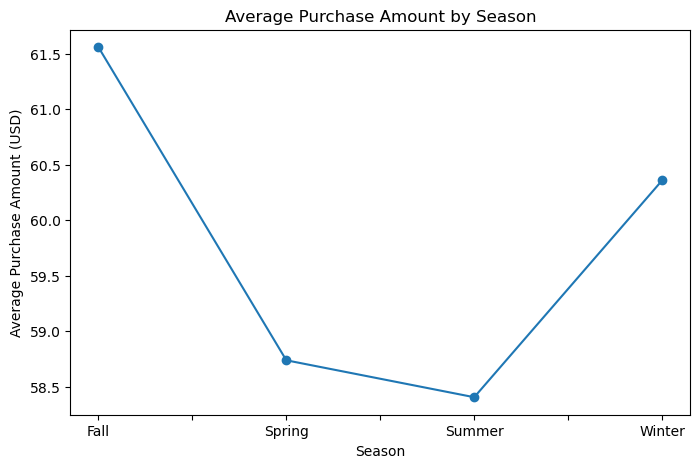

In [118]:
shopping_trends.groupby('Season')['Purchase Amount (USD)'].mean().plot.line( marker='o', figsize=(8, 5))
plt.title("Average Purchase Amount by Season")
plt.ylabel("Average Purchase Amount (USD)")
plt.show()

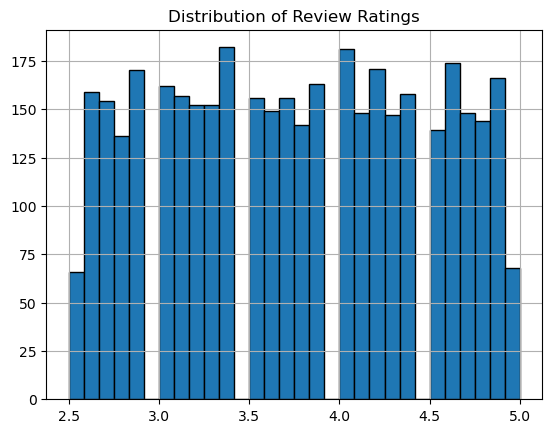

In [119]:
shopping_trends['Review Rating'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Review Ratings')
plt.show()

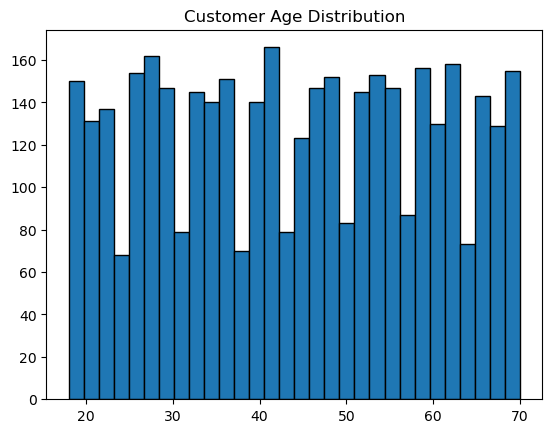

In [120]:
plt.hist(shopping_trends['Age'], bins=30, edgecolor='black')
plt.title('Customer Age Distribution')
plt.show()

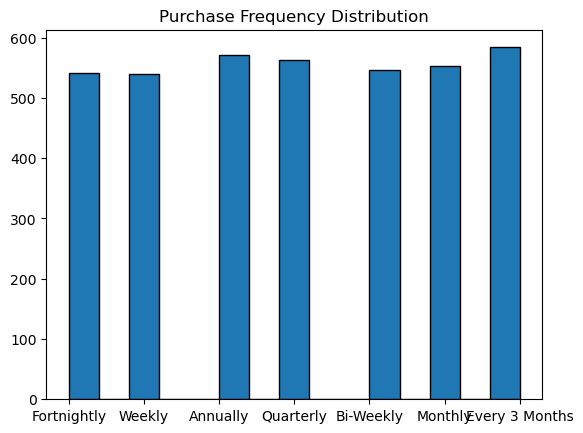

In [121]:
plt.hist(shopping_trends['Frequency of Purchases'], bins=15, edgecolor='black')
plt.title('Purchase Frequency Distribution')
plt.show()

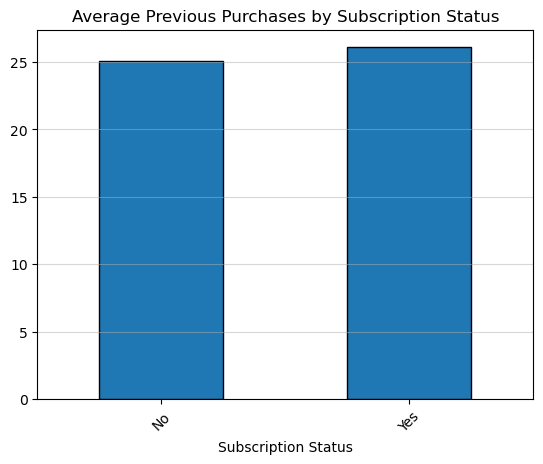

In [122]:
category_means = shopping_trends.groupby('Subscription Status')['Previous Purchases'].mean().sort_values()
bars = category_means.plot.bar(edgecolor='black')
plt.title("Average Previous Purchases by Subscription Status")
plt.grid(axis='y', alpha=0.5)
plt.xticks(rotation=45)
plt.show()


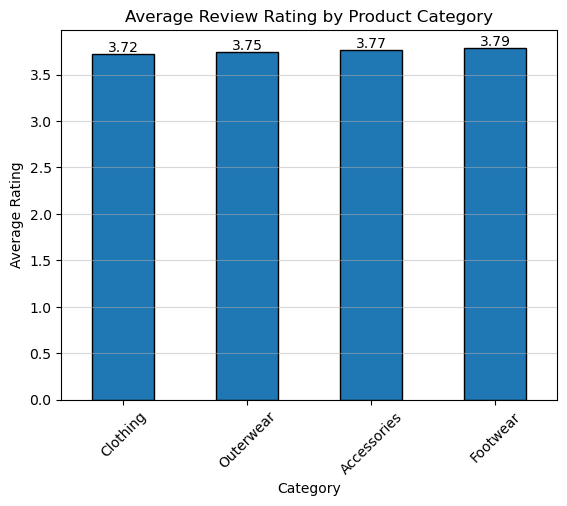

In [123]:
category_means = shopping_trends.groupby('Category')['Review Rating'].mean().sort_values()
bars = category_means.plot.bar(edgecolor='black')
plt.title("Average Review Rating by Product Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.grid(axis='y', alpha=0.5)
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.02,
        f"{bar.get_height():.2f}",
        ha='center',
    )
plt.xticks(rotation=45)
plt.show()


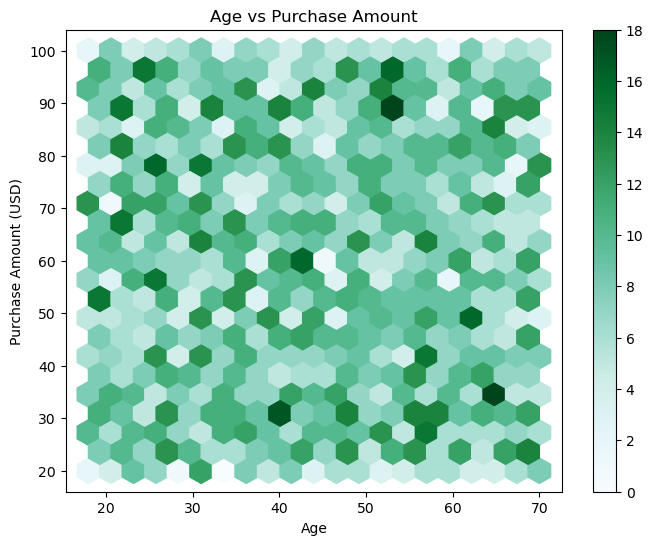

In [124]:
shopping_trends.plot.hexbin(x='Age', y='Purchase Amount (USD)', gridsize=20, figsize=(8,6))
plt.title("Age vs Purchase Amount")
plt.show()

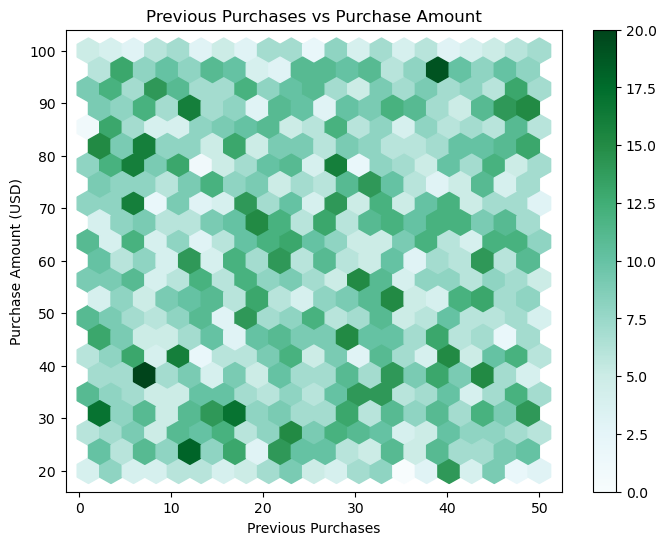

In [125]:
shopping_trends.plot.hexbin(x='Previous Purchases', y='Purchase Amount (USD)', gridsize=20, figsize=(8,6))
plt.title("Previous Purchases vs Purchase Amount")
plt.show()

<Axes: xlabel='Previous Purchases', ylabel='Purchase Amount (USD)'>

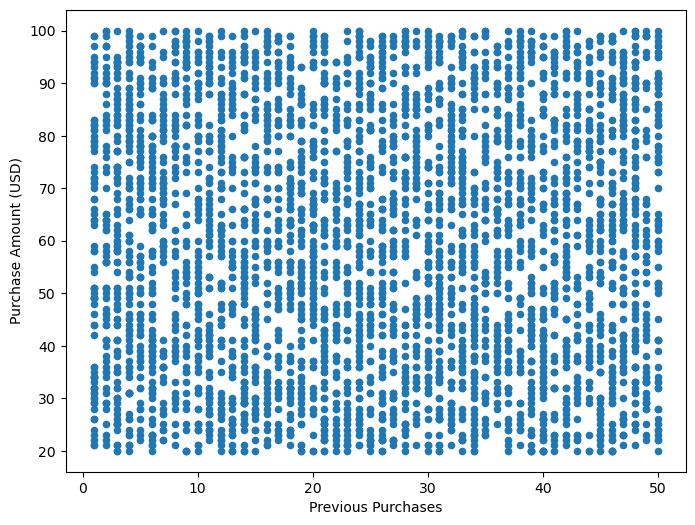

In [126]:
shopping_trends.plot.scatter(x='Previous Purchases', y='Purchase Amount (USD)', figsize=(8,6))

<Axes: xlabel='Review Rating', ylabel='Purchase Amount (USD)'>

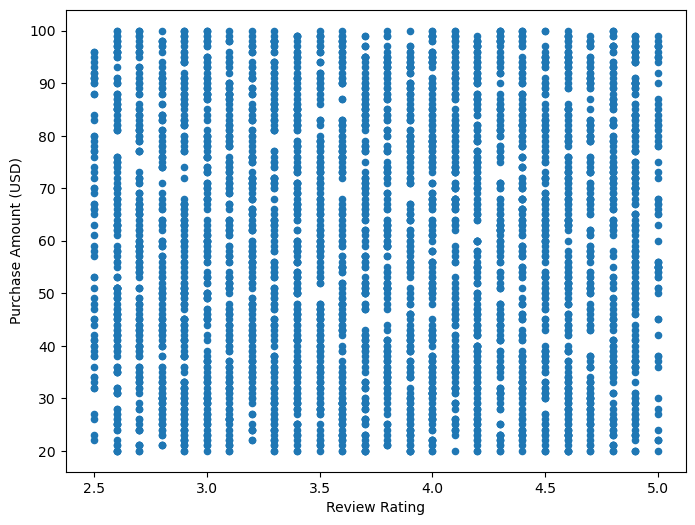

In [127]:
shopping_trends.plot.scatter(x='Review Rating', y='Purchase Amount (USD)', figsize=(8,6))

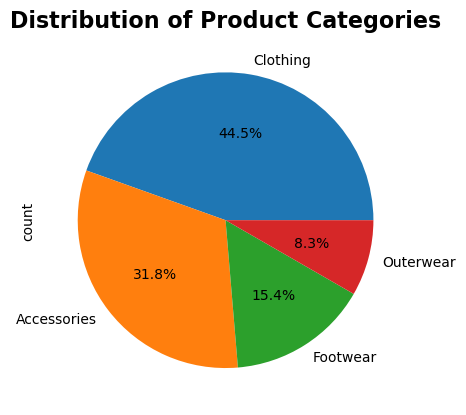

In [128]:
shopping_trends['Category'].value_counts().plot.pie( autopct='%1.1f%%')
plt.title('Distribution of Product Categories', fontsize=16, weight='bold')
plt.show()

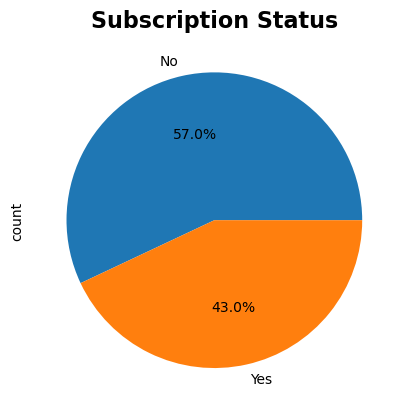

In [129]:
shopping_trends['Discount Applied'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Subscription Status', fontsize=16, weight='bold')
plt.show()

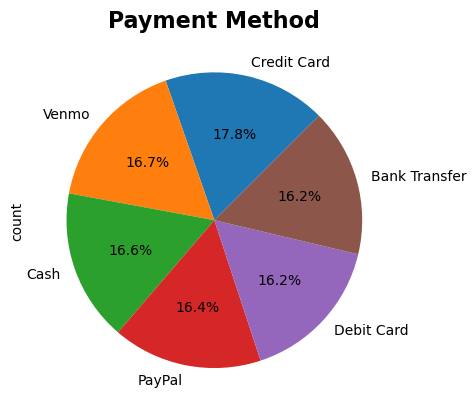

In [130]:
shopping_trends['Payment Method'].value_counts().plot.pie( startangle=45, autopct='%1.1f%%')
plt.title('Payment Method', fontsize=16, weight='bold')
plt.show()

In [131]:
shopping_trends.isnull().sum()

Customer ID                    0
Age                            0
Gender                         0
Item Purchased                 0
Category                       0
Purchase Amount (USD)          0
Location                       0
Size                           0
Color                          0
Season                         0
Review Rating                  0
Subscription Status            0
Payment Method                 0
Shipping Type                  0
Discount Applied               0
Promo Code Used                0
Previous Purchases             0
Preferred Payment Method       0
Frequency of Purchases         0
Frequency Score             2266
Age Group                      0
dtype: int64

In [132]:
print(shopping_trends['Subscription Status'].value_counts(normalize=True))

Subscription Status
No     0.73
Yes    0.27
Name: proportion, dtype: float64
